In [1]:
import pandas as pd

In [2]:
funnel=pd.read_excel('AssignmentData.xlsx',sheet_name="WorkerFunnel")

In [3]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
3,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,NaN


In [4]:
funnel.shape

(1197, 7)

In [5]:

# Perform exploratory analysis
# Display basic information about the dataset
print("Dataset Info:")
print(funnel.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1197 non-null   object 
 1   Quarter                1197 non-null   object 
 2   Department             1197 non-null   object 
 3   Targeted Productivity  1197 non-null   float64
 4   Overtime               1197 non-null   int64  
 5   No. of Workers         1197 non-null   float64
 6   Actual Productivity    1167 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 65.6+ KB
None


In [6]:
# Display summary statistics
print("\nSummary Statistics:")
funnel.describe()



Summary Statistics:


,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
count,1197.000000,1197.000000,1197.000000,1167.000000
mean,0.729632,4567.460317,34.609858,0.734882
std,0.097891,3348.823563,22.197687,0.174629
min,0.070000,0.000000,2.000000,0.233705
25%,0.700000,1440.000000,9.000000,0.650272
50%,0.750000,3960.000000,34.000000,0.773333
75%,0.800000,6960.000000,57.000000,0.850176
max,0.800000,25920.000000,89.000000,1.120437


In [7]:
funnel['Department'].unique()

array(['Sewing', 'Finishing'], dtype=object)

There are only two departments

In [8]:
funnel['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4', 'Q5'], dtype=object)

In [9]:
funnel['Date'].unique()

array([datetime.datetime(2015, 1, 1, 0, 0),
       datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 4, 1, 0, 0),
       datetime.datetime(2015, 5, 1, 0, 0),
       datetime.datetime(2015, 6, 1, 0, 0),
       datetime.datetime(2015, 7, 1, 0, 0),
       datetime.datetime(2015, 8, 1, 0, 0),
       datetime.datetime(2015, 10, 1, 0, 0),
       datetime.datetime(2015, 11, 1, 0, 0),
       datetime.datetime(2015, 12, 1, 0, 0), '1/13/2015', '1/14/2015',
       '1/15/2015', '1/17/2015', '1/18/2015', '1/19/2015', '1/20/2015',
       '1/21/2015', '1/22/2015', '1/24/2015', '1/25/2015', '1/26/2015',
       '1/27/2015', '1/28/2015', '1/29/2015', '1/31/2015',
       datetime.datetime(2015, 1, 2, 0, 0),
       datetime.datetime(2015, 2, 2, 0, 0),
       datetime.datetime(2015, 3, 2, 0, 0),
       datetime.datetime(2015, 4, 2, 0, 0),
       datetime.datetime(2015, 5, 2, 0, 0),
       datetime.datetime(2015, 7, 2, 0, 0),
       datetime.datetime(2015, 8, 2, 0, 0),
       datetime.date

In [10]:
# Identify missing/blank values
missing_values = funnel.isnull().sum()
print("\nMissing Values:")
print(missing_values)



Missing Values:
Date                      0
Quarter                   0
Department                0
Targeted Productivity     0
Overtime                  0
No. of Workers            0
Actual Productivity      30
dtype: int64


In [11]:
# Calculate the mean of the column
mean_value=funnel['Actual Productivity'].mean()
mean_value

0.7348818812733504

In [12]:
# Fill null values with the mean
funnel['Actual Productivity'] = funnel['Actual Productivity'].fillna(mean_value)

In [13]:
#checking null values
funnel.isnull().sum()


Date                     0
Quarter                  0
Department               0
Targeted Productivity    0
Overtime                 0
No. of Workers           0
Actual Productivity      0
dtype: int64

In [14]:
# Identify duplicate rows
duplicate_rows = funnel.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 36


In [15]:
# Remove duplicated rows
funnel = funnel.drop_duplicates()


In [16]:
#now counting duplicates
funnel.duplicated().sum()

0

In [17]:
funnel.shape

(1161, 7)

In [18]:
# Step 1: Create the "Target Achieved" column
funnel['Target Achieved'] = funnel['Actual Productivity'] > funnel['Targeted Productivity']
funnel['Target Achieved'] = funnel['Target Achieved'].map({True: 'Yes', False: 'No'})


In [19]:
funnel.head()

,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Target Achieved
0,2015-01-01 00:00:00,Q1,Sewing,0.80,7080,59.0,0.940725,Yes
1,2015-01-01 00:00:00,Q1,Finishing,0.75,960,8.0,0.886500,Yes
2,2015-01-01 00:00:00,Q1,Sewing,0.80,3660,30.5,0.800570,Yes
4,2015-01-01 00:00:00,Q1,Sewing,0.80,1920,56.0,0.734882,No
5,2015-01-01 00:00:00,Q1,Sewing,0.80,6720,56.0,0.800125,Yes


In [20]:

# Perform tasks using the specified columns
# Calculate the total overtime per department
total_overtime_per_department = funnel.groupby('Department')['Overtime'].sum()

# Calculate the average number of workers per quarter
average_workers_per_quarter = funnel.groupby('Quarter')['No. of Workers'].mean()

# Calculate the total productivity (actual productivity * number of workers) per quarter
funnel['Total Productivity'] = funnel['Actual Productivity'] * funnel['No. of Workers']
total_productivity_per_quarter = funnel.groupby('Quarter')['Total Productivity'].sum()


In [21]:
# Summarize the results

print("Total Overtime per Department:")
print(total_overtime_per_department)

print("\nAverage Number of Workers per Quarter:")
print(average_workers_per_quarter)

print("\nTotal Productivity per Quarter:")
print(total_productivity_per_quarter)


Total Overtime per Department:
Department
Finishing     945480
Sewing       4268390
Name: Overtime, dtype: int64

Average Number of Workers per Quarter:
Quarter
Q1    34.504335
Q2    33.162037
Q3    36.160194
Q4    34.286008
Q5    32.690476
Name: No. of Workers, dtype: float64

Total Productivity per Quarter:
Quarter
Q1    8950.056020
Q2    7850.264418
Q3    5152.822713
Q4    5887.532544
Q5    1076.474918
Name: Total Productivity, dtype: float64


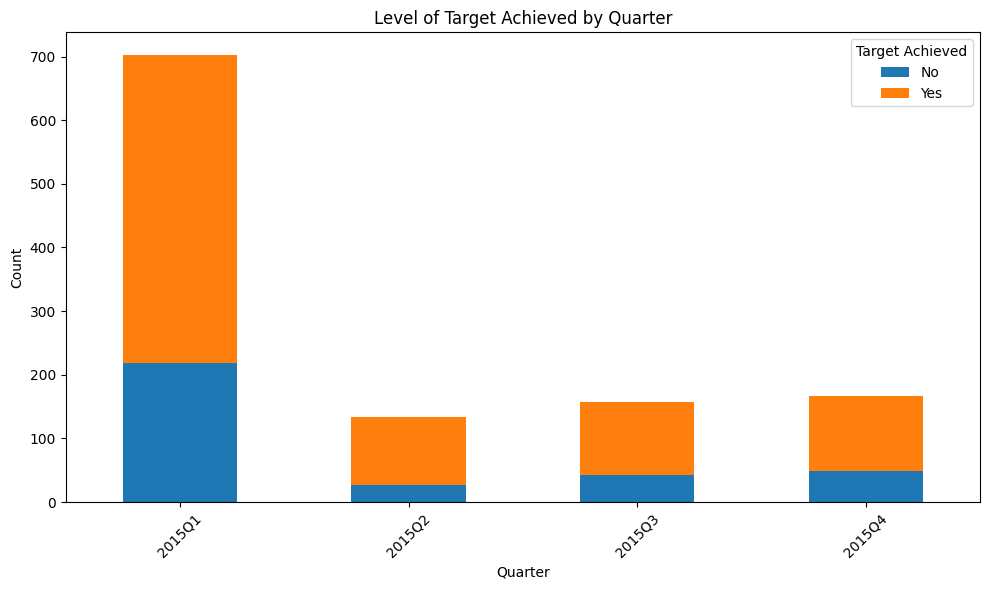

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date_column' is the name of the date column in the dataset

# Convert the date column to datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Group data by quarter and 'Target Achieved'
grouped_data = funnel.groupby([funnel['Date'].dt.to_period("Q"), 'Target Achieved']).size().unstack()

# Plot the grouped bar graph
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.title('Level of Target Achieved by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target Achieved')

# Show plot
plt.tight_layout()
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

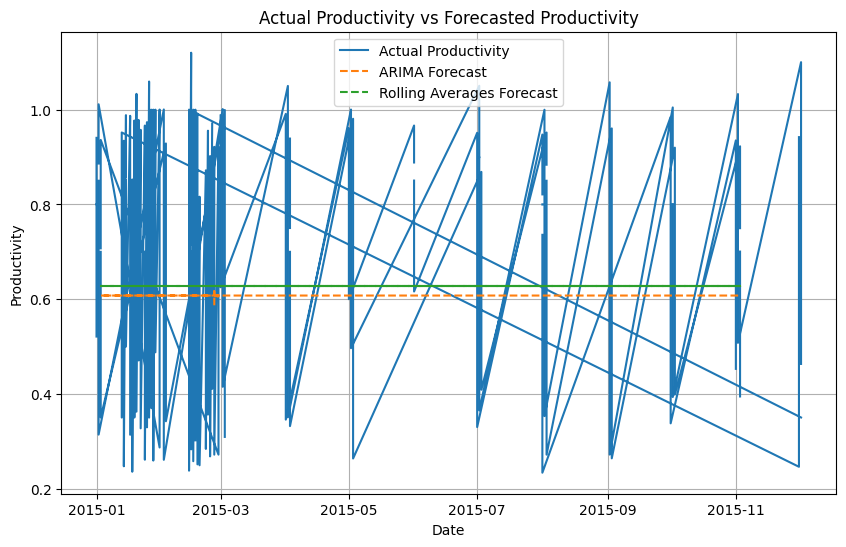

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Read the data from the Excel file into a DataFrame
file_path = 'AssignmentData.xlsx'
sheet_name = 'WorkerFunnel'
funnel = pd.read_excel(file_path, sheet_name=sheet_name)

# Assuming your dataset has columns as described
# Ensure 'Date' column is in datetime format
funnel['Date'] = pd.to_datetime(funnel['Date'])

# Set 'Date' column as index
funnel.set_index('Date', inplace=True)

# ARIMA model
def forecast_arima(train_data, periods):
    model = ARIMA(train_data, order=(5,1,0))  # ARIMA(p,d,q) - Adjust parameters accordingly
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=periods)
    return forecast

# Rolling Averages model
def forecast_rolling_avg(train_data, window_size, periods):
    rolling_avg = train_data.rolling(window=window_size).mean().iloc[-1]
    forecast = pd.Series([rolling_avg] * periods, index=pd.date_range(start=train_data.index[-1], periods=periods, freq='M'))
    return forecast

# Train-test split using scikit-learn
X = funnel[['Quarter', 'Department', 'Targeted Productivity', 'Overtime', 'No. of Workers']]  # Features
y = funnel['Actual Productivity']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Forecast using ARIMA
arima_forecast = forecast_arima(y_train, periods=len(X_test))

# Forecast using Rolling Averages
rolling_avg_forecast = forecast_rolling_avg(y_train, window_size=4, periods=len(X_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(X.index, y, label='Actual Productivity')
plt.plot(X_test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.plot(X_test.index, rolling_avg_forecast, label='Rolling Averages Forecast', linestyle='--')
plt.title('Actual Productivity vs Forecasted Productivity')
plt.xlabel('Date')
plt.ylabel('Productivity')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Convert Quarter column to numerical format
quarter_mapping = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4, 'Q5': 5}
funnel['Quarter_Num'] = funnel['Quarter'].map(quarter_mapping)

# Prepare data for ARIMA model
actual_productivity = funnel['Actual Productivity']

# Fit ARIMA model
arima_model = ARIMA(actual_productivity, order=(5,1,0))  # Example order, you might need to tune this
arima_result = arima_model.fit()

# Forecast next four quarters using ARIMA
arima_forecast = arima_result.forecast(steps=4)

# Display the forecasted values with quarters
last_quarter = funnel['Quarter_Num'].max()
#last_quarter_num = int(last_quarter[1:])  # Extract numeric portion
forecast_quarters = [f'q{last_quarter + i}' for i in range(-4, 0)]
for quarter, forecast in zip(forecast_quarters, arima_forecast):
    print(f"{quarter}: {forecast}")


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-

q1: 0.43916311738975006
q2: 0.468700083017869
q3: 0.48586895607384595
q4: 0.49456164865341495


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [25]:

# Calculate Rolling Averages
rolling_avg = actual_productivity.rolling(window=4, min_periods=1).mean().iloc[-1]

# Forecast next four quarters using Rolling Averages
rolling_avg_forecast = [rolling_avg] * 4  # Assuming the next four quarters

# Extracting the last quarter number
last_quarter_num = last_quarter  # Directly use the last recorded quarter
forecast_quarters = ['Q' + str(i) for i in range(last_quarter_num - 4, last_quarter_num )]
for quarter, forecast in zip(forecast_quarters, rolling_avg_forecast):
    
    print(f"{quarter}: {forecast}")


Q1: 0.5087453703333333
Q2: 0.5087453703333333
Q3: 0.5087453703333333
Q4: 0.5087453703333333


In [26]:
# productivity of next four quarters according to ARIMA  

q1: 0.4391631173855981
q2: 0.46870008301128624
q3: 0.4858689560686357
q4: 0.4945616486564609

In [27]:
# productivity of next four quarters according to rolling averages..  


Q1: 0.5087453703333333
Q2: 0.5087453703333333
Q3: 0.5087453703333333
Q4: 0.5087453703333333


In [28]:
funnel.head()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Quarter_Num
Date,,,,,,,
2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,1
2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,1
2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,1
2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,1
2015-01-01,Q1,Sewing,0.80,1920,56.0,NaN,1


In [29]:
# Assuming 'Quarter' is the name of the column containing quarters in your DataFrame
# and '0.5087453703333333' is the forecasted value for q1
Rolling_forecasted_value = 0.5087453703333333


# Add a new column 'Forecasted_Productivity' and fill it with the forecasted value
funnel['Rolling_Forecasted_Productivity'] =  Rolling_forecasted_value


In [30]:
import numpy as np

# Given forecasted values for quarters q1 to q4
Arima_forecasted_values = [0.4391631173855981, 0.46870008301128624, 0.4858689560686357, 0.4945616486564609]

# Calculate the mean of the forecasted values for quarters q1 to q4
mean_forecasted_value = np.mean(Arima_forecasted_values)

# Fill the forecasted values for quarters q1 to q4 in the DataFrame
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for quarter, forecasted_value in zip(quarters, Arima_forecasted_values):
    funnel.loc[funnel['Quarter'] == quarter, 'Arima_Forecasted_Productivity'] = forecasted_value

# Fill the mean forecasted value for quarter q5 in the DataFrame
funnel.loc[funnel['Quarter'] == 'Q5', 'Arima_Forecasted_Productivity'] = mean_forecasted_value


In [31]:
funnel.head()

,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity,Quarter_Num,Rolling_Forecasted_Productivity,Arima_Forecasted_Productivity
Date,,,,,,,,,
2015-01-01,Q1,Sewing,0.80,7080,59.0,0.940725,1,0.508745,0.439163
2015-01-01,Q1,Finishing,0.75,960,8.0,0.886500,1,0.508745,0.439163
2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,1,0.508745,0.439163
2015-01-01,Q1,Sewing,0.80,3660,30.5,0.800570,1,0.508745,0.439163
2015-01-01,Q1,Sewing,0.80,1920,56.0,NaN,1,0.508745,0.439163


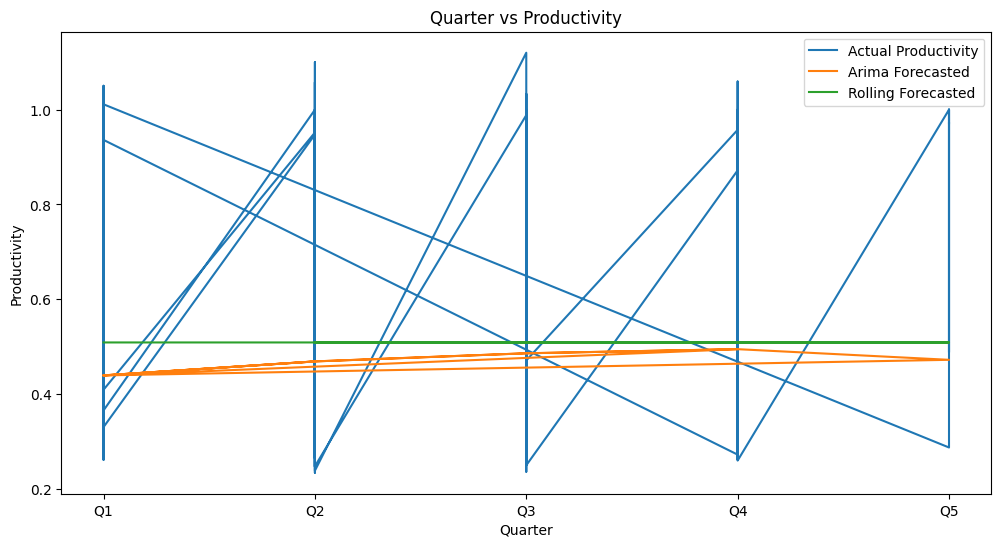

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Line plot for Date vs Actual Productivity, Arima_Forecasted_Productivity, and Rolling_Forecasted_Productivity
plt.figure(figsize=(12, 6))
plt.plot(funnel['Quarter'], funnel['Actual Productivity'], label='Actual Productivity')
plt.plot(funnel['Quarter'], funnel['Arima_Forecasted_Productivity'], label='Arima Forecasted')
plt.plot(funnel['Quarter'], funnel['Rolling_Forecasted_Productivity'], label='Rolling Forecasted')
plt.xlabel('Quarter')
plt.ylabel('Productivity')
plt.title('Quarter vs Productivity')
plt.legend()
plt.show()

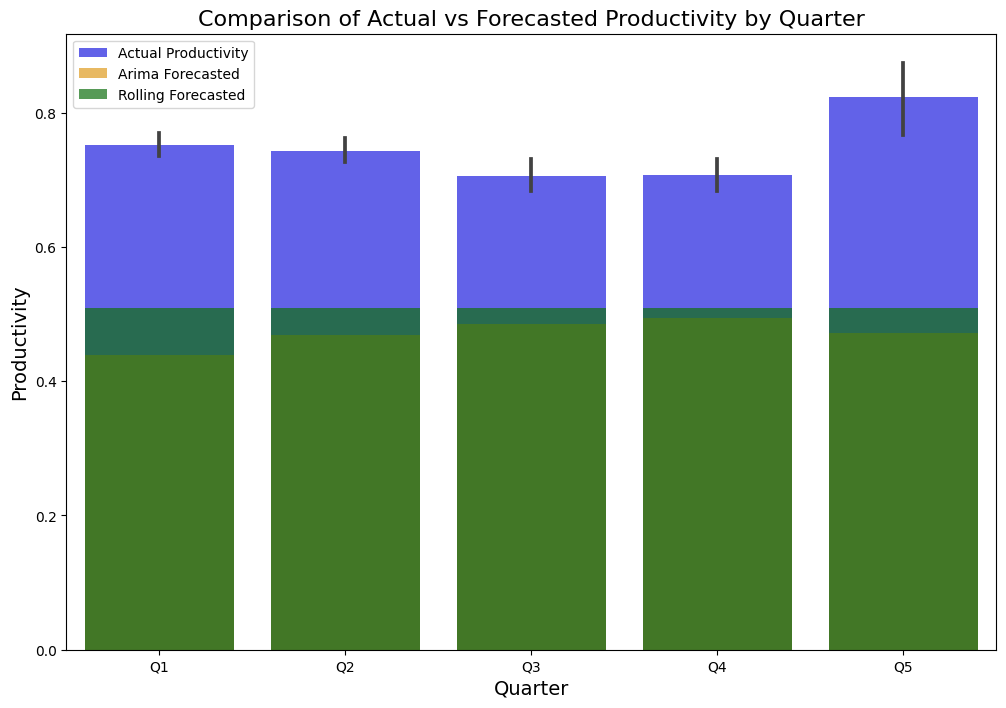

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv("your_dataset.csv")  # Replace "your_dataset.csv" with the actual file path

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot Actual Productivity
sns.barplot(x='Quarter', y='Actual Productivity', data=funnel, color='blue', alpha=0.7, label='Actual Productivity')

# Plot Arima Forecasted Productivity
sns.barplot(x='Quarter', y='Arima_Forecasted_Productivity', data=funnel, color='orange', alpha=0.7, label='Arima Forecasted')

# Plot Rolling Forecasted Productivity
sns.barplot(x='Quarter', y='Rolling_Forecasted_Productivity', data=funnel, color='green', alpha=0.7, label='Rolling Forecasted')

# Add labels and title
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Productivity', fontsize=14)
plt.title('Comparison of Actual vs Forecasted Productivity by Quarter', fontsize=16)
plt.legend()

# Show the plot
plt.show()


C:\Users\shiva\AppData\Local\Temp\ipykernel_24320\931258105.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Quarter', y='Arima_Forecasted_Productivity', data=funnel, ci=None)


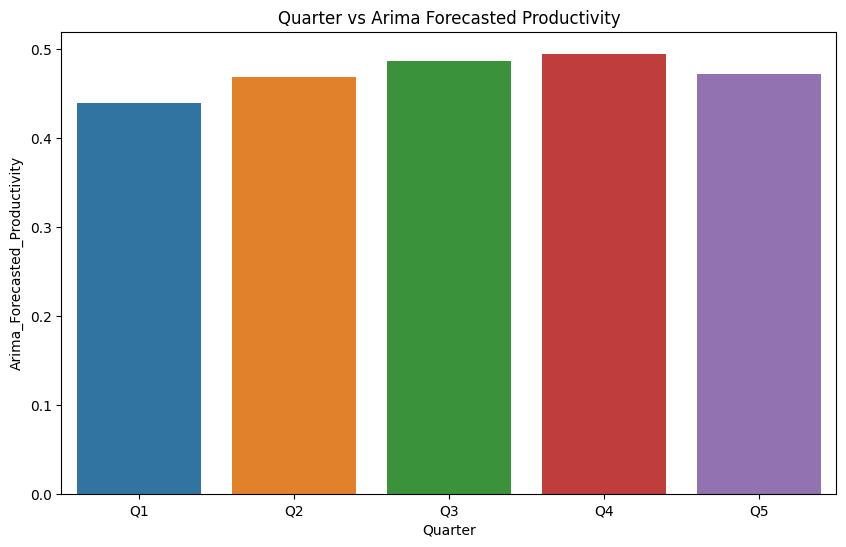

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Arima_Forecasted_Productivity', data=funnel, ci=None)
plt.title('Quarter vs Arima Forecasted Productivity')
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_24320\1264220697.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Quarter', y='Rolling_Forecasted_Productivity', data=funnel, ci=None)


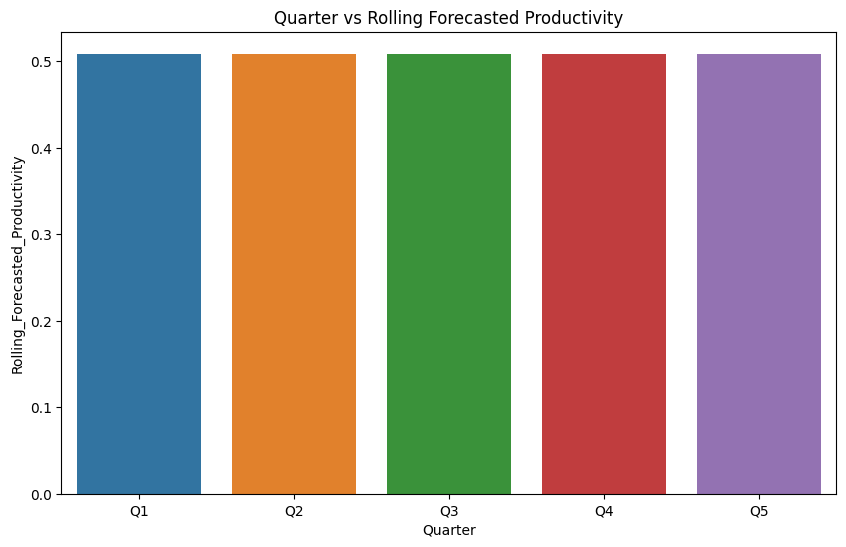

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='Rolling_Forecasted_Productivity', data=funnel, ci=None)
plt.title('Quarter vs Rolling Forecasted Productivity')
plt.show()

In [36]:
import numpy as np

# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(actual, forecasted):
    return np.mean(np.abs((actual - forecasted) / actual)) * 100

# Calculate Mean Squared Error (MSE)
def calculate_mse(actual, forecasted):
    return np.mean((actual - forecasted) ** 2)

# Given data
actual_productivity = funnel['Actual Productivity']  # Actual productivity values
arima_forecasted_productivity = funnel['Arima_Forecasted_Productivity']  # ARIMA forecasted productivity values
rolling_forecasted_productivity = funnel['Rolling_Forecasted_Productivity']  # Rolling forecasted productivity values

# Calculate MAPE and MSE for ARIMA model
arima_mape = calculate_mape(actual_productivity, arima_forecasted_productivity)
arima_mse = calculate_mse(actual_productivity, arima_forecasted_productivity)

# Calculate MAPE and MSE for Rolling Average model
rolling_mape = calculate_mape(actual_productivity, rolling_forecasted_productivity)
rolling_mse = calculate_mse(actual_productivity, rolling_forecasted_productivity)

# Create a summary comparison
summary_comparison = {
    "Model": ["ARIMA", "Rolling Average"],
    "Mean Absolute Percentage Error (MAPE)": [arima_mape, rolling_mape],
    "Mean Squared Error (MSE)": [arima_mse, rolling_mse]
}

# Convert summary comparison to DataFrame
import pandas as pd
summary_df = pd.DataFrame(summary_comparison)

# Display the summary comparison
summary_df


,Model,Mean Absolute Percentage Error (MAPE),Mean Squared Error (MSE)
0,ARIMA,37.907548,0.102746
1,Rolling Average,34.146863,0.081607


<Figure size 1000x600 with 0 Axes>

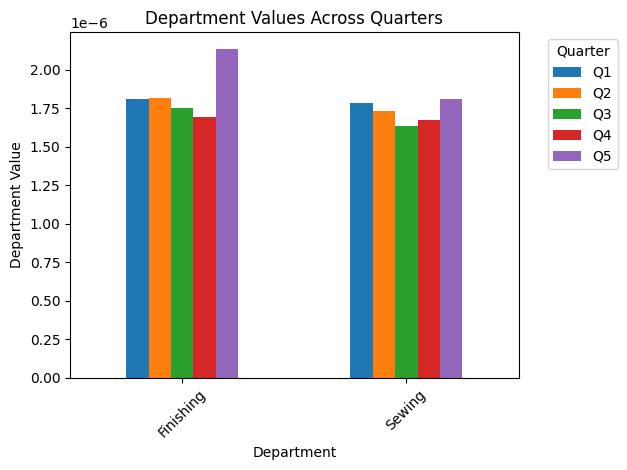

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


funnel['Quarterly Spend']=840000



# Calculate Department Value
funnel['Department Value'] = funnel['Actual Productivity'] / (funnel['Quarterly Spend'] / 2)  # Divide by 2 for each department

# Pivot table to aggregate department values by quarter
pivot_df = funnel.pivot_table(index='Department', columns='Quarter', values='Department Value', aggfunc='mean')

# Plotting
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=False)
plt.title('Department Values Across Quarters')
plt.xlabel('Department')
plt.ylabel('Department Value')
plt.xticks(rotation=45)
plt.legend(title='Quarter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
